In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io
from scipy import signal

In [ ]:
im = io.imread('/content/peppers.png')

# **AIM**
T o apply spatial filters on the given image

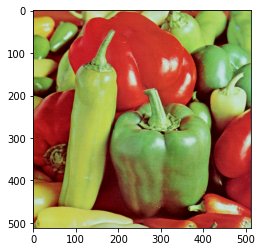

In [ ]:
# displaying given image
plt.imshow(im)

In [ ]:
sh = im.shape
sh
#displaying the shape of image

(512, 512, 3)

In [ ]:
rows = sh[0]
cols = sh[1]

In [ ]:
#keeping the mean 0 and stddev  as 20 to generate noise
mean , stddev = 0 , 20
#generating nosie
gaussian_noise = np.random.normal(mean, stddev,(rows,cols))

In [ ]:
#keeping the mean 0 and stddev  as 20 to generate noise
mean , stddev = 0 , 50
#generating nosie
gaussian_noise = np.random.normal(mean, stddev,(rows,cols))

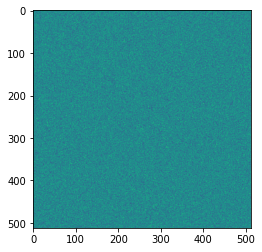

In [ ]:
plt.imshow(gaussian_noise)

In [ ]:
#taking noise of same size as image
gaussian_noise.shape

(512, 512)

In [ ]:
im_noisy = im.copy()

In [ ]:
# adding noise at every plane
im_noisy[:,:,0] = im_noisy[:,:,0] +gaussian_noise # R
im_noisy[:,:,1] = im_noisy[:,:,1] +gaussian_noise # G
im_noisy[:,:,2] = im_noisy[:,:,2] +gaussian_noise # B

Generating average filter

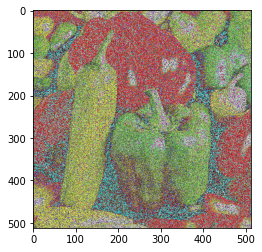

In [ ]:
plt.imshow(im_noisy)
# displaying noisy image

In [ ]:
#avg filter having 11 rows and 1 cols having all elements as 1
sz = 11
a_filter = ( np.ones((sz,sz)) )/(sz*sz)

#filtered image
image_avg_filtered = im_noisy.copy()


In [ ]:
#convolving the image and filter at every plane
image_avg_filtered[:,:,0] = signal.convolve2d( im_noisy[:,:,0] ,a_filter , mode = 'same' )
image_avg_filtered[:,:,1] = signal.convolve2d( im_noisy[:,:,1] ,a_filter , mode = 'same' )
image_avg_filtered[:,:,2] = signal.convolve2d( im_noisy[:,:,2] ,a_filter , mode = 'same' )
# mode = smae keeps the dimention of the convolved image same

Text(0.5, 1.0, 'Filtered Image')

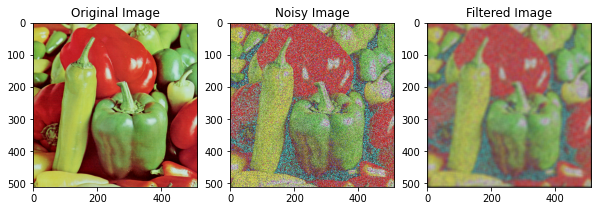

In [ ]:
# std dev as 20
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(im)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(im_noisy)
plt.title("Noisy Image")

plt.subplot(1,3,3)
plt.imshow(image_avg_filtered)
plt.title("Filtered Image")

Text(0.5, 1.0, 'Filtered Image')

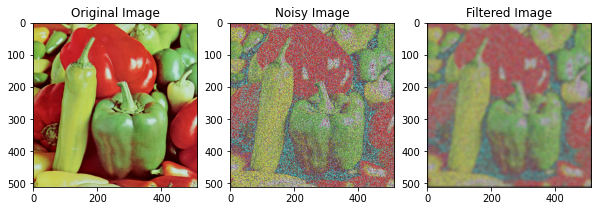

In [ ]:
# after changing the std dev to 50
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(im)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(im_noisy)
plt.title("Noisy Image")

plt.subplot(1,3,3)
plt.imshow(image_avg_filtered)
plt.title("Filtered Image")

# **PART - 2**
Adding salt and pepper noise



In [ ]:
from skimage.color import rgb2gray
from random import seed, randint

In [ ]:
im_watch = io.imread('/content/watch (1).png')

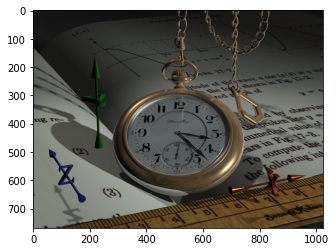

In [ ]:
plt.imshow(im_watch)

In [ ]:
#converting image to gray
im_gray = rgb2gray(im_watch)

In [ ]:
sh = im_gray.shape
sh

(768, 1024)

In [ ]:
rows = sh[0]
cols = sh[1]

In [ ]:
im_sp_noisy = im_gray.copy()

In [ ]:
# sp_proportion = 0.2
sp_proportion = 0.5 # 50 % of the total pixels are converted
sp_num_pixels = sp_proportion*rows*cols

In [ ]:
sp_noise =1
seed (25)

In [ ]:
sp=1
for i in range (int(sp_num_pixels)):
  temp1 = randint(0 , rows-1)
  temp2 = randint(0 , cols-1)
  im_sp_noisy[temp1][temp2] = sp
  if sp ==1:
    sp =0
  else:
    sp =1


Applying Median filter


*   Extract 
*   Reshape
* Sort
* Replace the value by median value



In [ ]:
im_sp_filtered = im_sp_noisy.copy()

In [ ]:
# sz_w = 3
sz_w = 9
mask_center = int((sz_w-1)/2)
median_local = int((((sz_w*sz_w)-1)/2))

for r in range(0,rows - sz_w):
  for c in range(0,cols - sz_w):
    temp1 = im_sp_noisy[r: r+sz_w , c: c+sz_w ]
    temp2 = np.reshape( temp1 , (1, sz_w*sz_w))
    temp3 = np.sort(temp2)

    im_sp_filtered[ r+ mask_center , c + mask_center] = temp3[0][median_local]

Text(0.5, 1.0, 'Filtered Image')

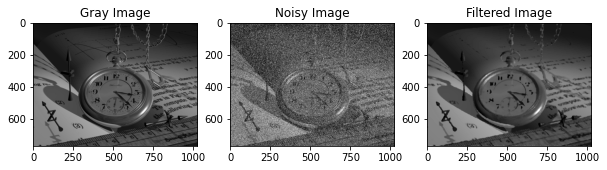

In [ ]:
# 0.5 and 9 x 9 filter
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(im_gray , cmap ='gray')
plt.title("Gray Image")

plt.subplot(1,3,2)
plt.imshow(im_sp_noisy , cmap ='gray')
plt.title("Noisy Image")

plt.subplot(1,3,3)
plt.imshow( im_sp_filtered , cmap ='gray')
plt.title("Filtered Image")

Text(0.5, 1.0, 'Filtered Image')

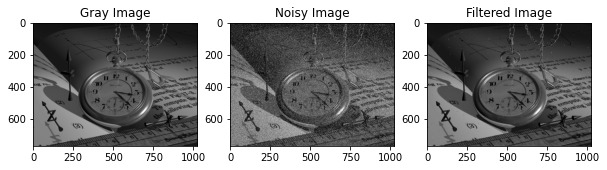

In [ ]:
# for 20% and 3x3 filter
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(im_gray , cmap ='gray')
plt.title("Gray Image")

plt.subplot(1,3,2)
plt.imshow(im_sp_noisy , cmap ='gray')
plt.title("Noisy Image")

plt.subplot(1,3,3)
plt.imshow( im_sp_filtered , cmap ='gray')
plt.title("Filtered Image")

# **CONCLUSION**
**PART -1** - Average Filter
*  The given image  is added with gaussian noise of stddev 20 and mean value =0
* To reduce the noise of this image average filetr of size 11 x11 is applied ,filtered image shows that the noise of img has reduced and the image is blurry

*   If std dev is increased to 50 , the filter of size 11 x 11 is not very effective , if filter size is increased to 15 x 15, the noise is reduced but the image gets more blurry


**PART -2** - Median Filter
*   Given Image is added with salt and pepper noise at 20% of the total number of pixels 
*  if median filter of size 3x3 is used - all the pixels with salt and pepper noise are clean

*   If 50 % of the pixels are affected by salt and pepper noise , then filtered image shows more number of noisy pixels 


*   If filter size is increased to 9 x 9, the effect of noise is reduced further

